In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification

x,y=make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,
                        n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [26]:
x.shape

(100, 2)

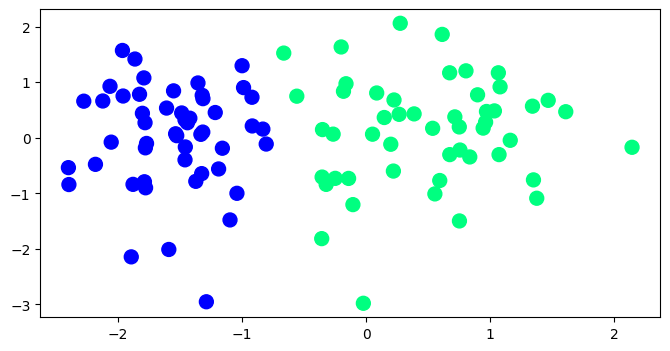

In [27]:
plt.figure(figsize=(8,4))
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)

In [28]:
def step(x):
    return 1 if x>0 else 0

In [29]:
step(-5)

0

In [30]:
x.shape[0]

100

In [31]:
def perceptron(x,y):
    
    X = np.insert(x,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
    return weights[0],weights[1:]

In [32]:
intercept,coef_=perceptron(x,y)

In [33]:
intercept

np.float64(1.0)

In [34]:
coef_

array([1.29434749, 0.03943257])

In [35]:
m=-(coef_[0]/coef_[1])
b=-(intercept/coef_[1])

In [36]:
print(m)
print(b)

-32.82432683322791
-25.359748589524713


In [37]:
x_input=np.linspace(-3,3,100)
y_input=m * x_input +b

(-3.0, 2.0)

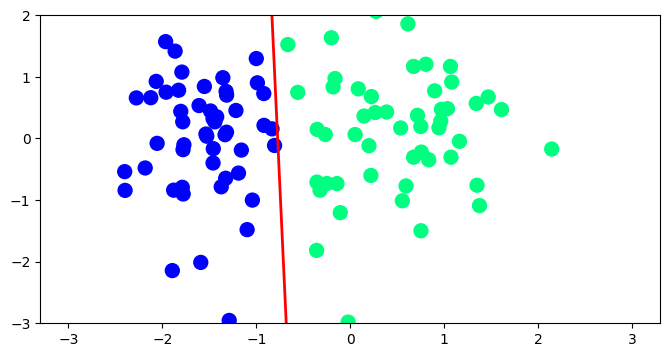

In [38]:
plt.figure(figsize=(8,4))
plt.plot(x_input,y_input,color='red',linewidth=2)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

In [39]:
def perceptron(X,y):
    
    m = []
    b = []
    
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]
        
        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))
        
    return m,b

In [40]:
m,b = perceptron(x,y)

In [41]:

from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

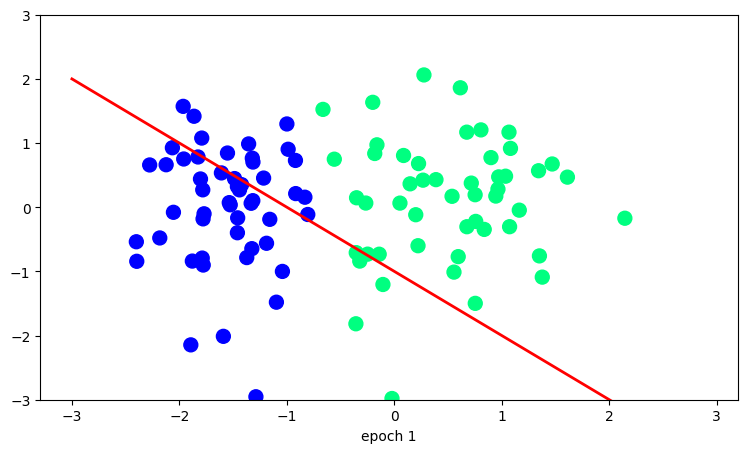

In [43]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
f = r"./images/animation.gif" 
writergif = animation.PillowWriter(fps=2) 
anim.save(f, writer=writergif)

In [20]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [22]:
x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

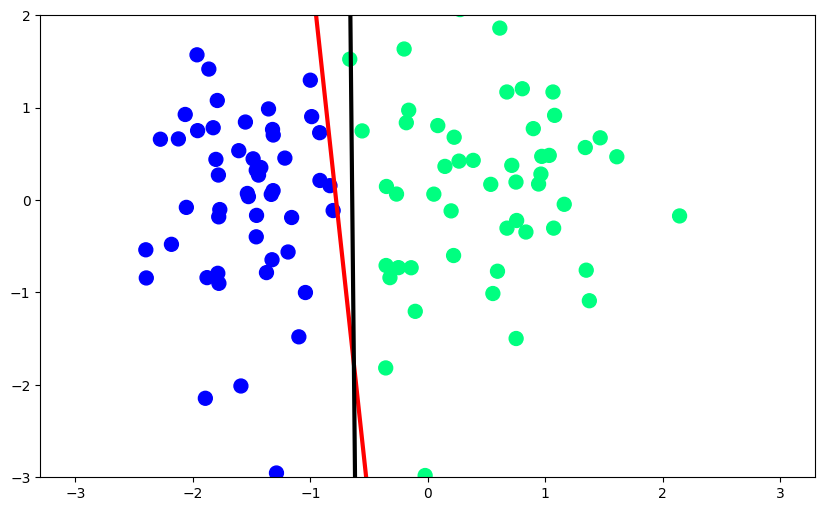

In [23]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='red',linewidth=3)
plt.plot(x_input1,y_input1,color='black',linewidth=3)
plt.scatter(x[:,0],x[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)
plt.show()